### Importing Libraries

In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Run before importing k-Means

import os
os.environ["omp_NUM_THREADS"] = '1'
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import plotly.express as px

### Loading dataset into notebook

In [2]:
# importing the dataset

dataset = pd.read_csv('segmentation data.csv')

### Data Exploration and preprocessing

In [3]:
# display the number of rows and columns respectively

dataset.shape

(2000, 8)

In [4]:
# checking for the first ten values in the dataset table 

dataset.head(10)

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   
5  100000006    0               0   35          1  144848           0   
6  100000007    0               0   53          1  156495           1   
7  100000008    0               0   35          1  193621           2   
8  100000009    0               1   61          2  151591           0   
9  100000010    0               1   28          1  174646           2   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  
5                0  
6                1  
7                1  
8                0  
9                0

In [5]:
# Reneaming and arranging the coulums for easy analyis and exploration

dataset.columns = ['CustomerID', 'Sex', 'Marital_status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement_Size']
dataset.head()

CustomerID  Sex  Marital_status  Age  Education  Income  Occupation  \
0   100000001    0               0   67          2  124670           1   
1   100000002    1               1   22          1  150773           1   
2   100000003    0               0   49          1   89210           0   
3   100000004    0               0   45          1  171565           1   
4   100000005    0               0   53          1  149031           1   

   Settlement_Size  
0                2  
1                2  
2                0  
3                1  
4                1

In [6]:
# check for the bottom part of the dataset 

dataset.tail()

CustomerID  Sex  Marital_status  Age  Education  Income  Occupation  \
1995   100001996    1               0   47          1  123525           0   
1996   100001997    1               1   27          1  117744           1   
1997   100001998    0               0   31          0   86400           0   
1998   100001999    1               1   24          1   97968           0   
1999   100002000    0               0   25          0   68416           0   

      Settlement_Size  
1995                0  
1996                0  
1997                0  
1998                0  
1999                0

In [7]:
# checking for data information such as number of entries in rows and coloumn
# check for data type: all data types are interger therefore there would be no need to convert any variables 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CustomerID       2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital_status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement_Size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [8]:
# Dataset discription showing count, mean, min-max, percentile and standard deviation of the dataset

dataset.describe()

CustomerID          Sex  Marital_status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement_Size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000         0.000000  
50%    115548.500000     1.000000         1.000000  
75%    138072.250000     1.000000         1.000000  
max    309364.000000     2.000000         2.000000

In [9]:
dataset.describe(include = 'all')

CustomerID          Sex  Marital_status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement_Size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000         0.000000  
50%    115548.500000     1.000000         1.000000  
75%    138072.250000     1.000000         1.000000  
max    309364.000000     2.000000         2.000000

In [10]:
# checking if there are any missing number or values in the data
# There is no missing values in all the coulums 

dataset.isnull().sum()

CustomerID         0
Sex                0
Marital_status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement_Size    0
dtype: int64

In [11]:
dataset.duplicated().sum()

0

In [12]:
# for the purpose of data visualization, will be importing the dataset again and assigning a differrent dataframe

data_visual = pd.read_csv('segmentation data.csv')

In [13]:
data_visual.head(2)

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   

   Settlement size  
0                2  
1                2

In [14]:
# This dataset is sub-divided into two, numerical and categorical variables
# categorical = Sex, Marital status, Education, Occupation, settlement size.
# numerical = Age, income.

In [15]:
# checking for the unique values 
data_visual.nunique()

ID                 2000
Sex                   2
Marital status        2
Age                  58
Education             4
Income             1982
Occupation            3
Settlement size       3
dtype: int64

In [16]:
# value counts in "sex" column
data_visual.Sex.value_counts()

Sex
0    1086
1     914
Name: count, dtype: int64

### Data Tranformation and Visualization

In [17]:
# converting integer numerical variables to str categorical variables
data_visual['Sex'] = data_visual['Sex'].replace([0, 1], ['Male', 'Female'])
data_visual.Sex.value_counts()

Sex
Male      1086
Female     914
Name: count, dtype: int64

In [18]:
# converting integer numerical variables to str categorical variables

data_visual['Marital status'] = data_visual['Marital status'].replace([0, 1], ['Single', 'Non_Single'])

data_visual['Education'] = data_visual['Education'].replace([0, 1, 2, 3], ['High_School', 'College', 
                                                                           'University', 'Post_Graduate'])

data_visual['Occupation'] = data_visual['Occupation'].replace([0, 1, 2], ['Unemployed', 'Employed', 'Self-Employed'])

data_visual['Settlement size'] = data_visual['Settlement size'].replace([0, 1, 2], ['City', 'Town', 'Village'])


In [19]:
# display the dataset to show the convertion of the categorical values

data_visual.head(5)

ID     Sex Marital status  Age   Education  Income  Occupation  \
0  100000001    Male         Single   67  University  124670    Employed   
1  100000002  Female     Non_Single   22     College  150773    Employed   
2  100000003    Male         Single   49     College   89210  Unemployed   
3  100000004    Male         Single   45     College  171565    Employed   
4  100000005    Male         Single   53     College  149031    Employed   

  Settlement size  
0         Village  
1         Village  
2            City  
3            Town  
4            Town

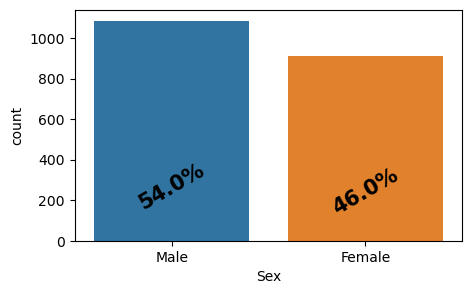

In [20]:
# visualising the dataset from the seaborn countplot function
fig = plt.figure(figsize=(5,3))
ax=sns.countplot(data=data_visual, x='Sex')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(data_visual)*100,0)}%",
            ha='center', size=15, weight='bold', rotation=30, color='Black')

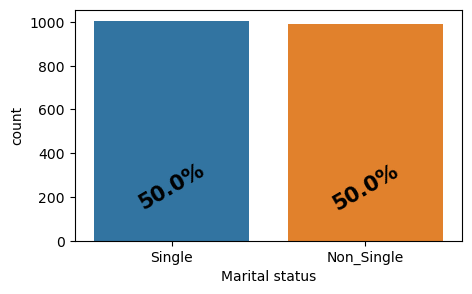

In [21]:
fig = plt.figure(figsize=(5,3))
ax=sns.countplot(data=data_visual, x='Marital status')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(data_visual)*100,0)}%",
            ha='center', size=15, weight='bold', rotation=30, color='Black')



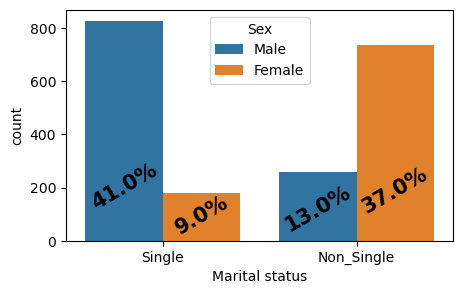

In [22]:
fig = plt.figure(figsize=(5,3))
ax=sns.countplot(data=data_visual, x='Marital status', hue = 'Sex')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(data_visual)*100,0)}%",
            ha='center', size=15, weight='bold', rotation=30, color='Black')


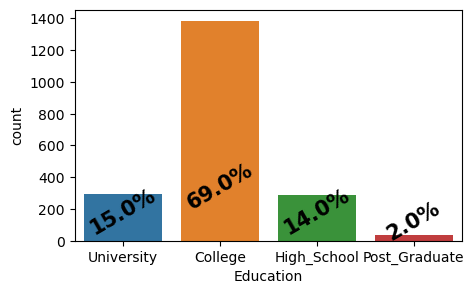

In [23]:
fig = plt.figure(figsize=(5,3))
ax=sns.countplot(data=data_visual, x='Education')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(data_visual)*100,0)}%",
            ha='center', size=15, weight='bold', rotation=30, color='Black')

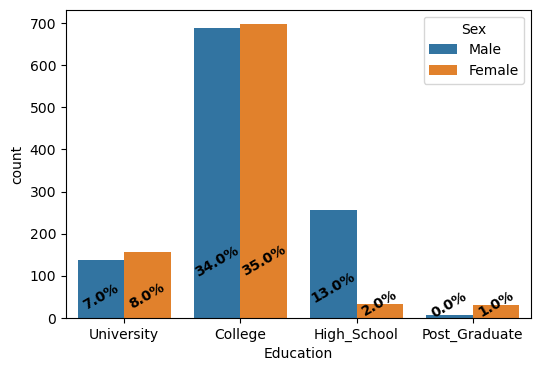

In [24]:
fig = plt.figure(figsize=(6,4))
ax=sns.countplot(data=data_visual, x='Education', hue = 'Sex')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(data_visual)*100,0)}%",
            ha='center', size=10, weight='bold', rotation=30, color='Black')

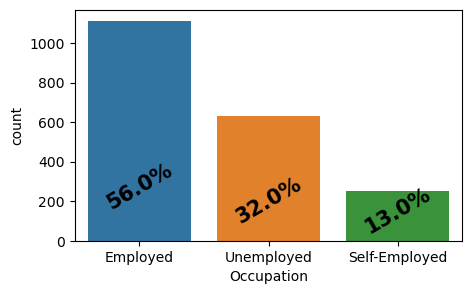

In [25]:
fig = plt.figure(figsize=(5,3))
ax=sns.countplot(data=data_visual, x='Occupation')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(data_visual)*100,0)}%",
            ha='center', size=15, weight='bold', rotation=30, color='Black')

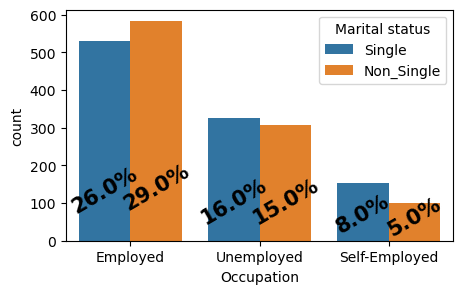

In [26]:
fig = plt.figure(figsize=(5,3))
ax=sns.countplot(data=data_visual, x='Occupation', hue = ('Marital status'))
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(data_visual)*100,0)}%",
            ha='center', size=15, weight='bold', rotation=30, color='Black')

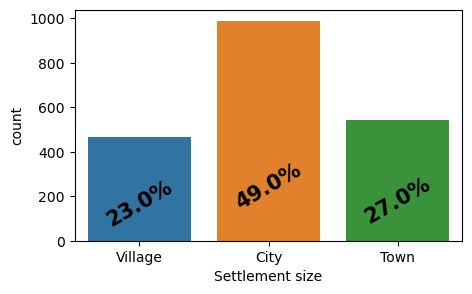

In [27]:
fig = plt.figure(figsize=(5,3))
ax=sns.countplot(data=data_visual, x='Settlement size')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(data_visual)*100,0)}%",
            ha='center', size=15, weight='bold', rotation=30, color='Black')

In [28]:
num_columns = ['ID','Age','Income']
cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']

data_visual[cat_columns] = data_visual[cat_columns].astype('str')

In [29]:
# With respect to age
def plot_hist_Sex(column_name):
    fig = go.Figure()

    fig.add_trace(go.Histogram(x=data_visual[column_name][data_visual['Sex'] == "Female"], name='Female', 
                               histfunc='count', marker_color='orange'))
    fig.add_trace(go.Histogram(x=data_visual[column_name][data_visual['Sex'] == 'Male'], name='Male', 
                               histfunc='count', marker_color='black'))

    fig.update_layout(barmode='group', xaxis_title=column_name, yaxis_title='Count', 
                      title=f'{column_name} Distribution by Sex')

    return fig.show()

In [30]:
plot_hist_Sex("Age")

In [31]:
# vusialise income distribution by Sex
plot_hist_Sex("Income")


In [32]:
# Education distribution by sex

plot_hist_Sex("Education")


In [33]:
# Occupation distribution by Sex

plot_hist_Sex("Occupation")


In [34]:
# Settlement size distribution by sex

plot_hist_Sex("Settlement size")


In [35]:
def plot_Income_hist(column_name):
    # Filter the data for the selected column value (city size in this case)
    data_incomeDist = data_visual[data_visual[column_name].notna()]

    # Create a histogram
    fig = px.histogram(data_incomeDist, x='Income', color=column_name, histfunc='count', nbins=15, 
                       title=f'{column_name} Distribution by Income')
    
    # Update the layout
    fig.update_layout(xaxis_title='Income', yaxis_title='Count')

    # Show the plot
    fig.show()



In [36]:
plot_Income_hist('Settlement size')

In [37]:
plot_Income_hist('Occupation')

In [38]:
plot_Income_hist('Marital status')

In [39]:
plot_Income_hist('Education')

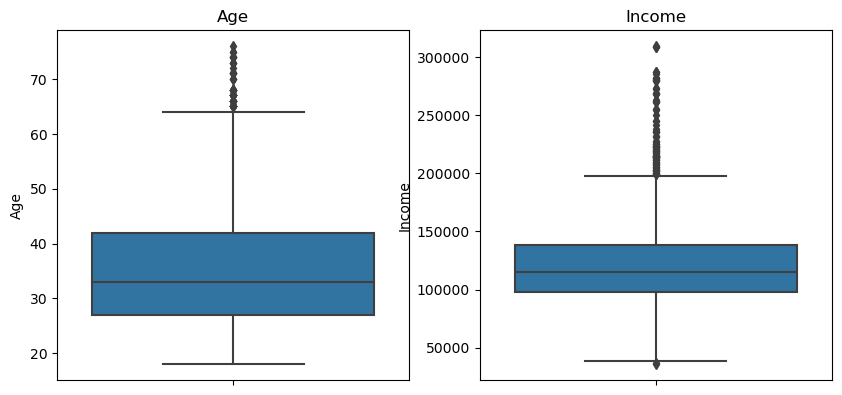

In [40]:
# using boxplot to visualize the outliers in the numerical columns of the dataset
plt.figure(figsize=(10,10))

plt.subplot2grid((2,2), (0,0))
box1 = sns.boxplot(y=data_visual.Age)
plt.title("Age")

plt.subplot2grid((2,2), (0,1))
box2 = sns.boxplot(y=data_visual.Income)
plt.title("Income")

plt.show()

### Data cleaning : Handling outliers

In [41]:

# Removing outliers
def remove_outliers_iqr(data_visual):
    # Select only numeric columns
    numeric_columns = data_visual.select_dtypes(include=[np.number])
    
    # Calculate IQR
    Q1 = numeric_columns.quantile(0.25)
    Q3 = numeric_columns.quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)
    
    # Remove outliers
    cleaned_data = data_visual[~outliers]
    
    return cleaned_data

cleaned_data_iqr = remove_outliers_iqr(data_visual)
cleaned_data_visual = cleaned_data_iqr


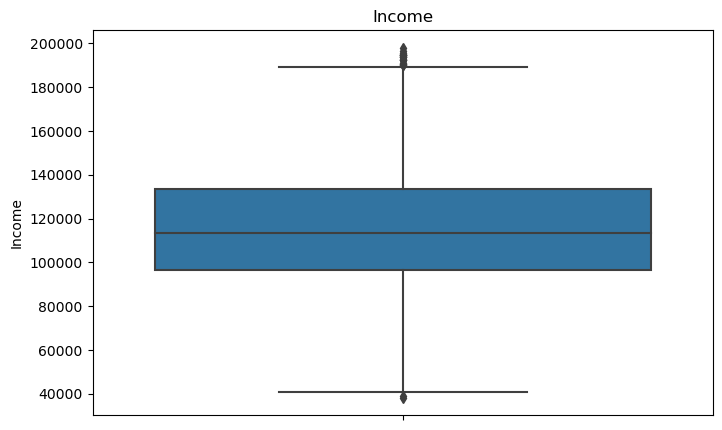

In [42]:
plt.figure(figsize=(8,5))

box2 = sns.boxplot(y=cleaned_data_visual.Income)
plt.title("Income")

plt.show()

Text(0.5, 1.0, 'Age')

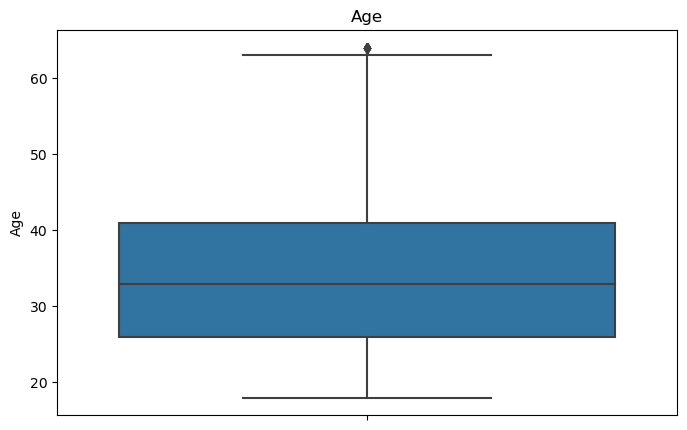

In [43]:
plt.figure(figsize=(8,5))

box1 = sns.boxplot(y=cleaned_data_visual.Age)
plt.title("Age")

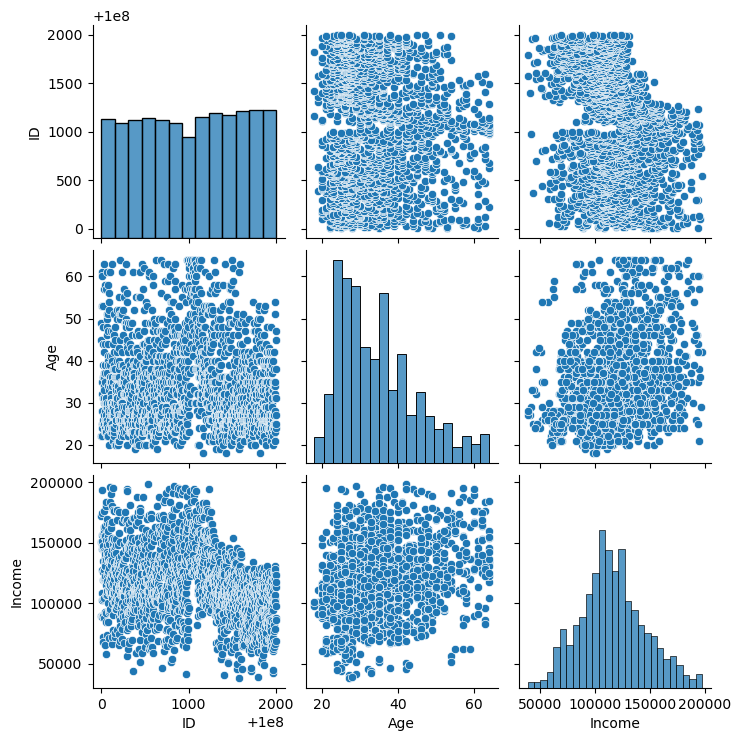

In [44]:
sns.pairplot(cleaned_data_visual.iloc[:,:])

### Hierarchical Clustering Method

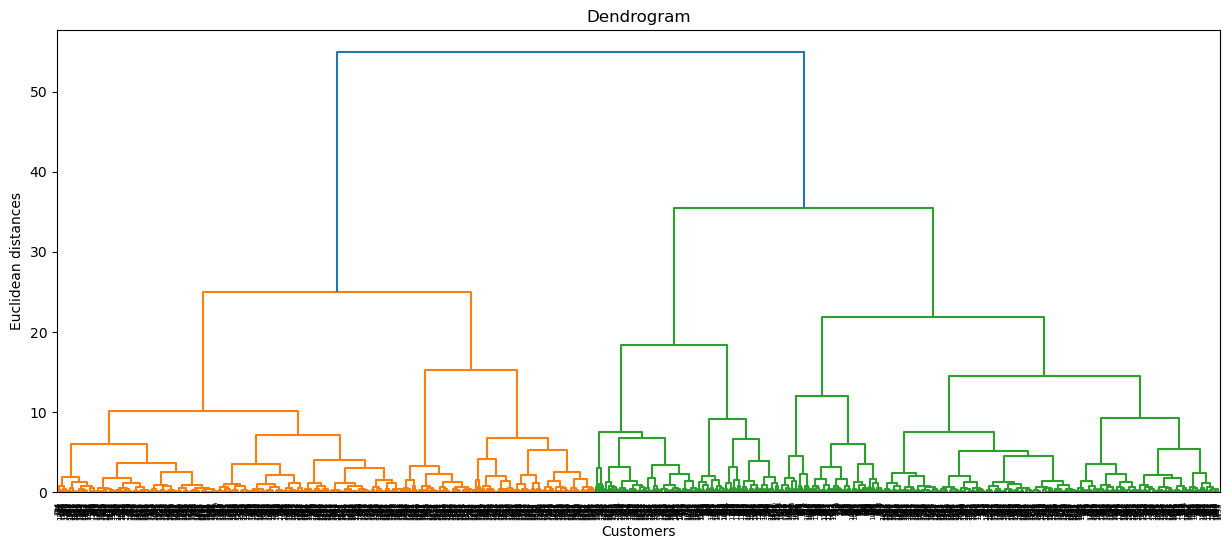

In [50]:
# Using the dendrogram  to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [51]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

In [52]:
y_hc

array([0, 2, 0, ..., 3, 3, 1], dtype=int64)

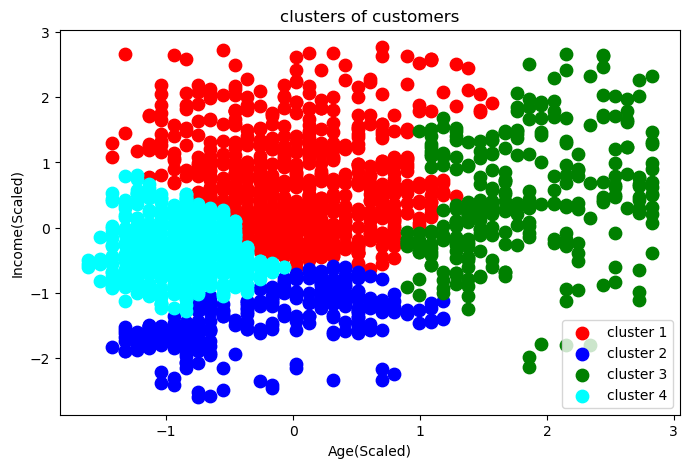

In [53]:
# visaulising the clusters

plt.figure(figsize=(8,5))
plt.scatter(x[y_hc == 0,0],x[y_hc == 0,1],s = 80, c = 'red', label = 'cluster 1')
plt.scatter(x[y_hc == 1,0],x[y_hc == 1,1],s = 80, c = 'blue', label = 'cluster 2')
plt.scatter(x[y_hc == 2,0],x[y_hc == 2,1],s = 80, c = 'green', label = 'cluster 3')
plt.scatter(x[y_hc == 3,0],x[y_hc == 3,1],s = 80, c = 'cyan', label = 'cluster 4')

plt.title('clusters of customers')
plt.xlabel('Age(Scaled)')
plt.ylabel('Income(Scaled)')
plt.legend()
plt.show()